In [66]:
import tensorflow as tf
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import itertools
from tensorflow.keras.callbacks import TensorBoard, LearningRateScheduler
from tensorflow.keras.layers import GlobalMaxPooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D, BatchNormalization

In [67]:
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


In [78]:
model = tf.keras.models.load_model("D:\Personal\Sanku_tips\Classification\checkpoints\cifar_basic_normalize_lowLR_aug_spatial_and_normal_dropout_REGU_BN_V8_100_epochs_20211207-051735\model_checkpoints\saved-model-59-0.80.h5")

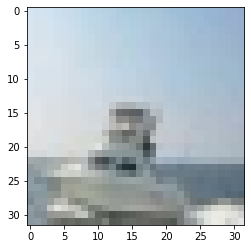

In [79]:
plt.imshow(x_train[100])

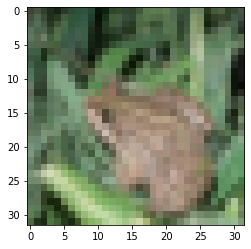

In [80]:
for idx in range(5):
    sample_org = x_test[idx]
    sample = tf.expand_dims(sample_org, axis=0)
    prediction = model.predict(sample)
    pred_softmaxed = tf.nn.softmax(prediction)
    plt.imshow(sample_org)

    

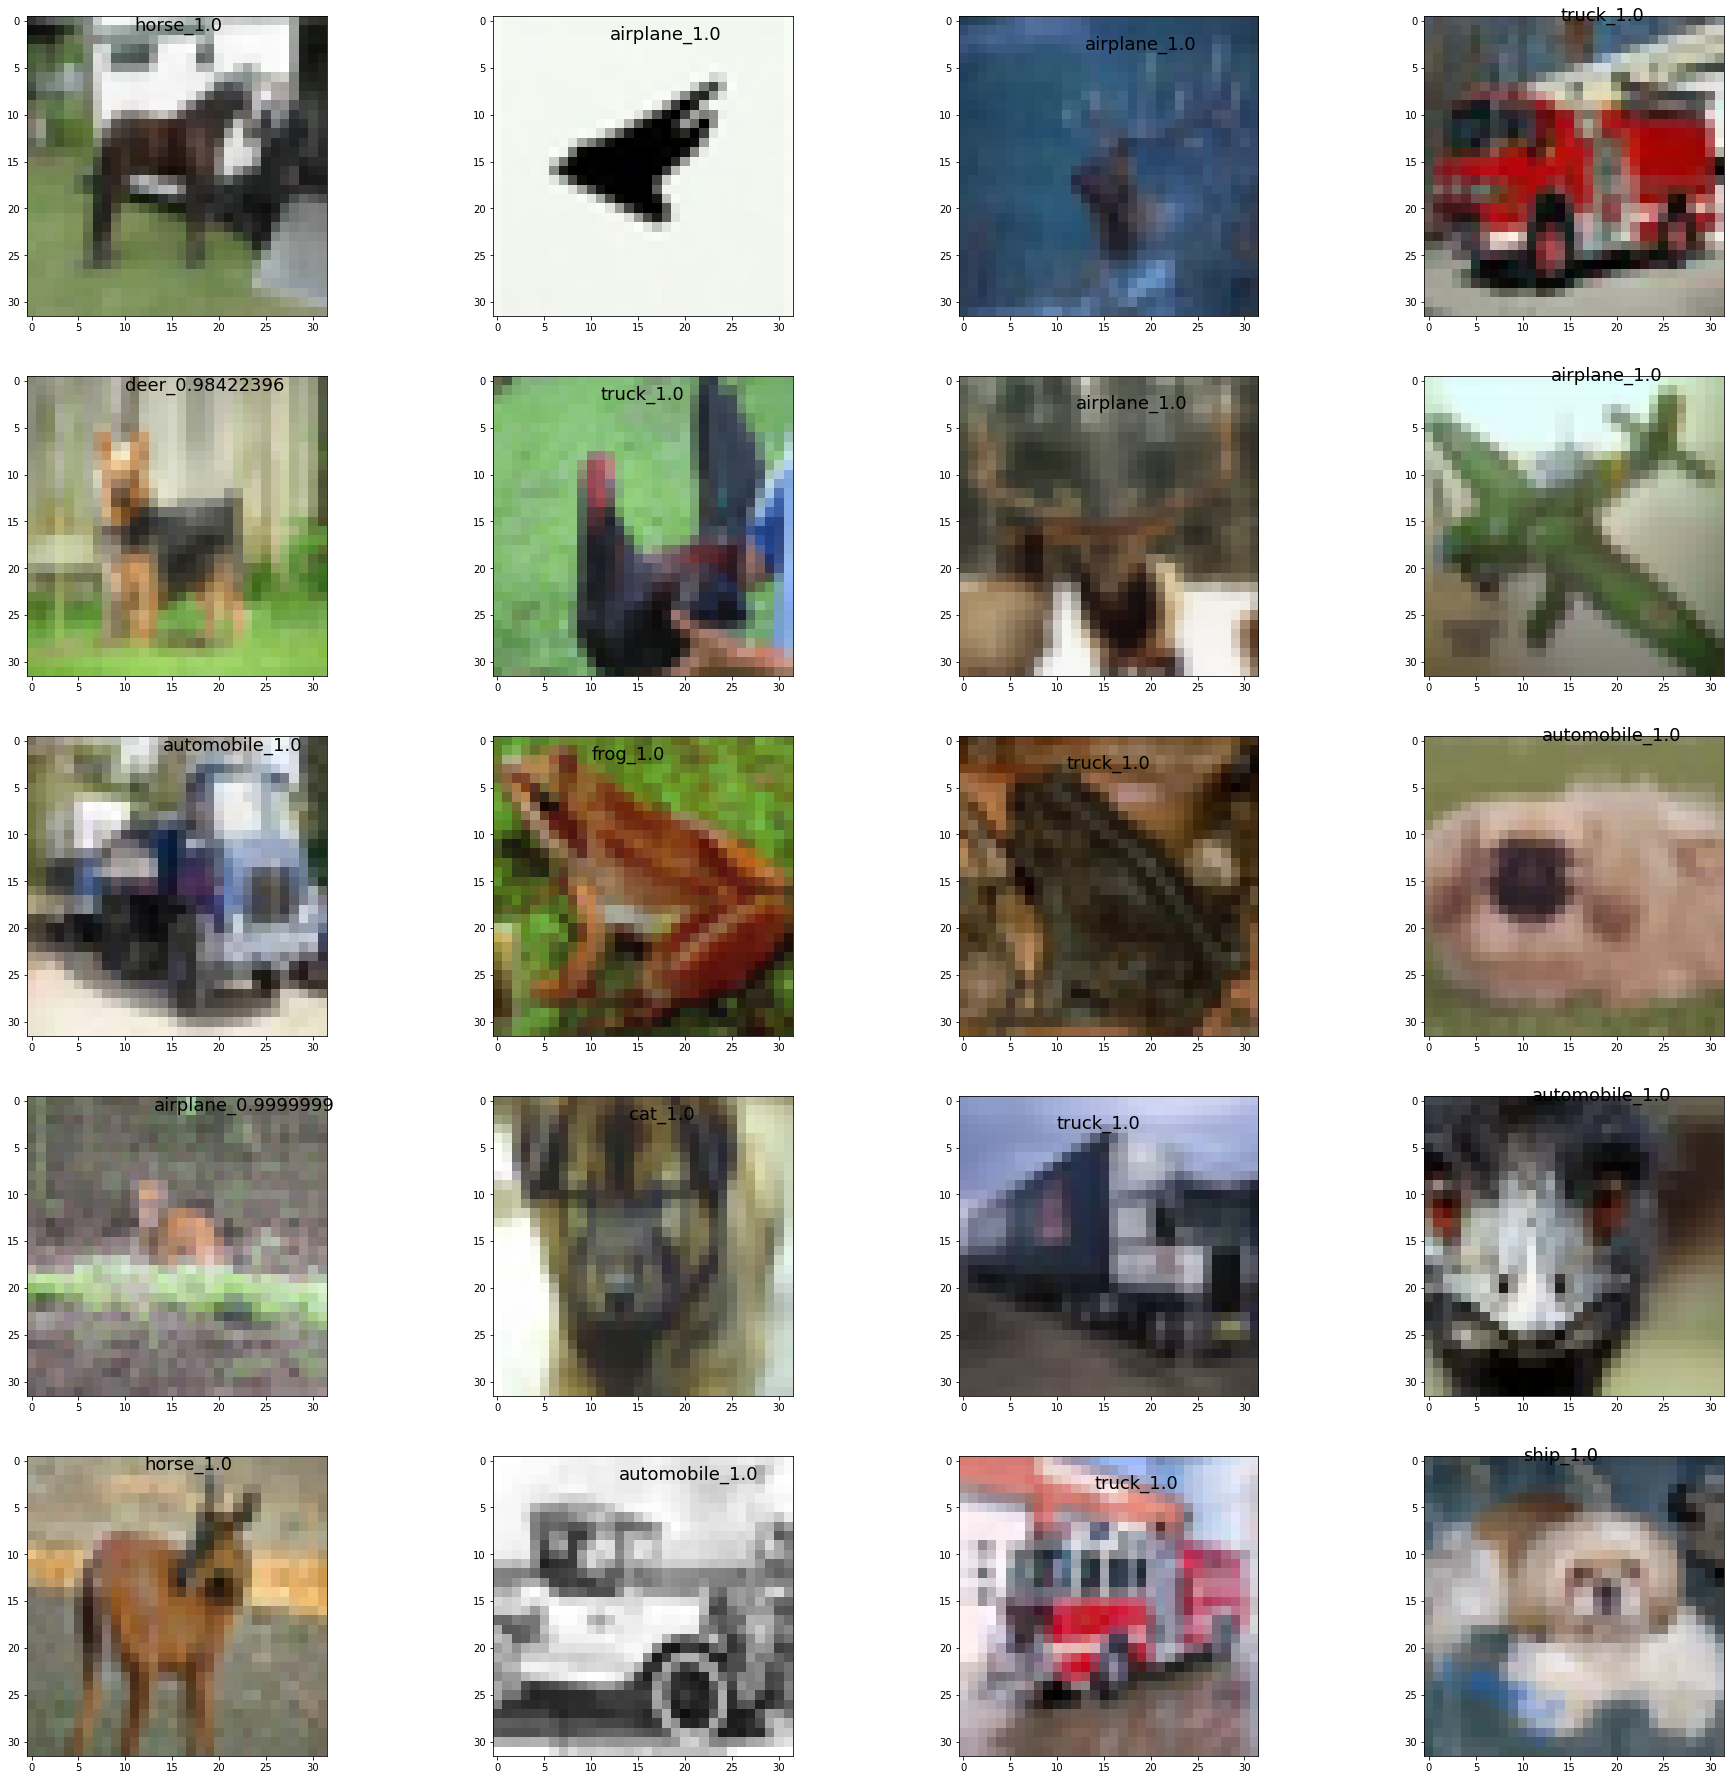

In [83]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
import cv2

w = 32
h = 32
fig = plt.figure(figsize=(32, 32))
columns = 4
rows = 5

position = ((int) (w//2), (int) (2))

row = 0
col = 0

for i, idx in zip(range(1, columns*rows +1), range(20,40)):
    row = (row+1) % columns
    col = (col+1) % rows
    sample_org = x_test[idx]
    
    # make prediction on image
    sample = tf.expand_dims(sample_org, axis=0)
    prediction = model.predict(sample)
    pred_softmaxed = tf.nn.softmax(prediction)[0]
    pred_softmaxed = pred_softmaxed.numpy()
    class_index = np.argmax(pred_softmaxed, axis=0)
    class_score = np.amax(pred_softmaxed, axis=0)

    fig.add_subplot(rows, columns, i)
    plt.imshow(sample_org)
    plt.text(10+col, (row), classes[class_index] + "_"+str(class_score), fontsize=18)
plt.show()